In [1]:
from pdrtpy.measurement import Measurement
from pdrtpy.modelset import ModelSet
from pdrtpy.plot.modelplot import ModelPlot
import pdrtpy.pdrutils as utils
from pdrtpy.tool.lineratiofit import LineRatioFit
from pdrtpy.plot.lineratioplot import LineRatioPlot
from astropy.nddata import StdDevUncertainty
import astropy.units as u
import numpy as np
#from lmfit import Model, Parameters, Minimizer, minimize, fit_report
import corner

/home/mpound/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1161: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(), op)(other)


In [2]:
from pdrtpy import version
version()

'2.2.2-interpolate'

### Data for pillar

In [3]:
myunit = "erg s-1 cm-2 sr-1" 
intensity = {
    "CII_158": 1.2E-3,
    "CO_32": 4.3E-6,
    "OI_63": 6.4E-3,
    "FIR": 0.9
}
error = {
    "CII_158": 1.83E-5,
    "CO_32": 2.54E-8,
    "OI_63": 3.30E-4,
    "FIR": 0.2*intensity["FIR"]  #guess 20%??
}
a = []
for k in intensity:
    a.append(Measurement(data=intensity[k],uncertainty = StdDevUncertainty(error[k]),identifier=k,unit=myunit))
for m in a:
    print(f'{m.id:>7s}  {m:3.2e}')

CII_158  1.20e-03 +/- 1.83e-05 erg / (cm2 s sr)
  CO_32  4.30e-06 +/- 2.54e-08 erg / (cm2 s sr)
  OI_63  6.40e-03 +/- 3.30e-04 erg / (cm2 s sr)
    FIR  9.00e-01 +/- 1.80e-01 erg / (cm2 s sr)


## Mark has new WK 2020 models as of 10/15

In [4]:
ms = ModelSet("wk2020",z=1)
ms.table.show_in_notebook()

idx,numerator,denominator,ratio,filename,z,title
,,,,,,null
0,OI_63,CII_158,OI_63/CII_158,OI63_CII158sm,1.0,[O I] 63 $\mu$m / [C II] 158 $\mu$m
1,OI_63+CII_158,FIR,OI_63+CII_158/FIR,OI63+CII158_FIRsm,1.0,([O I] 63 $\mu$m + [C II] 158 $\mu$m) / I$_{FIR}$
2,OI_145+CII_158,FIR,OI_145+CII_158/FIR,OI145+CII158_FIRsm,1.0,([O I] 145 $\mu$m + [C II] 158 $\mu$m) / I$_{FIR}$
3,OI_145,OI_63,OI_145/OI_63,OI145_OI63sm,1.0,[O I] 145 $\mu$m / [O I] 63 $\mu$m
4,CI_370,CI_609,CI_370/CI_609,CI370_CI609sm,1.0,[C I] 370 $\mu$m / [C I] 609 $\mu$m
5,CII_158,CI_609,CII_158/CI_609,CII158_CI609sm,1.0,[C II] 158 $\mu$m / [C I] 609 $\mu$m
6,CII_158,OI_145,CII_158/OI_158,CII158_OI145sm,1.0,[C II] 158 $\mu$m / [O I] 145 $\mu$m
7,CII_158,FIR,CII_158/FIR,CII158_FIRsm,1.0,[C II] 158 $\mu$m / I$_{FIR}$
8,CII_158,CO_10,CII_158/CO_10,CII158_CO10sm,1.0,[C II] 158 $\mu$m / CO(J=1-0)


### Do the fit with standard least squares, which is the default *method* to run()

In [5]:
p = LineRatioFit(ms,a)
p.run()
print(f' n = {p.density:.2e}\nG0 = {p.radiation_field:.2e}')

/home/mpound/src/pdrtpy/pdrtpy/tool/lineratiofit.py:353: UserWarning: LineRatioFit: No beam parameters in Measurement headers, assuming they are all equal!
  self._check_compatibility()


 n = 9.13e+03 +/- 3.56e+02 1 / cm3
G0 = 3.68e+00 +/- 4.54e-01 erg / (cm2 s)


### The fit resuls are stored in a *FitMap*, where each pixel contains a instance of an *MinimizerResult*.   
See https://lmfit-py.readthedocs.io/en/latest/fitting.html#minimizerresult-the-optimization-result

Since this is a single pixel example, the result is in index 0.

In [6]:
p.fit_result[0]

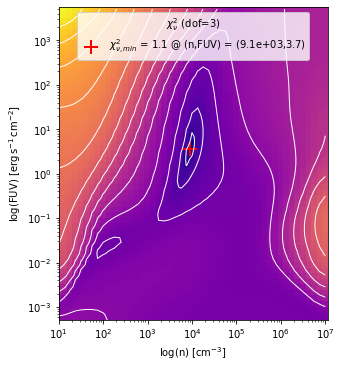

In [7]:
plot = LineRatioPlot(p)
plot.reduced_chisq(legend=True,norm='log')

/home/mpound/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


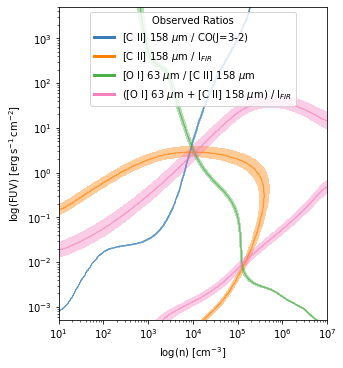

In [8]:
plot.overlay_all_ratios(measurements=None)

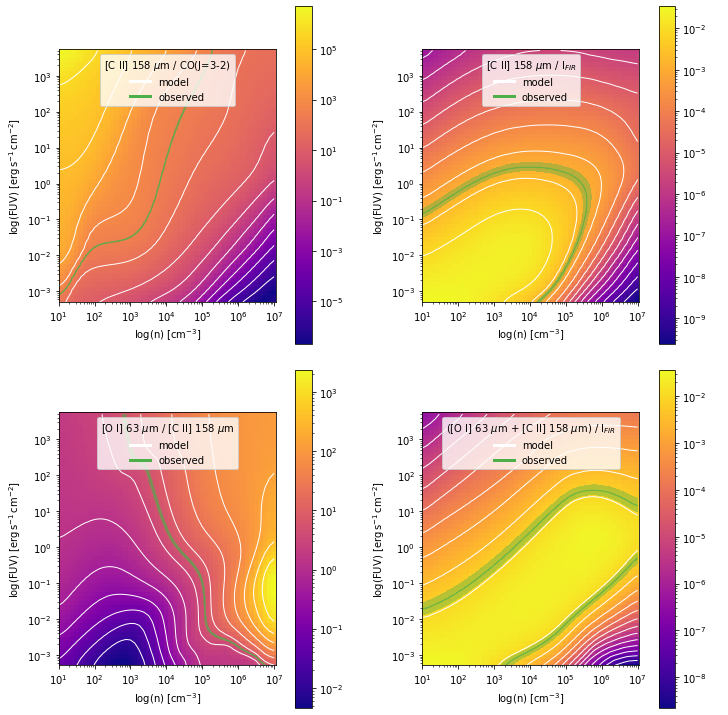

In [9]:
plot.ratios_on_models(image=True,ncols=2,meas_color=['#4daf4a'],norm='log')

### Let's get all Bayesian up in this crib
Instead of LSQ, you can use the emcee package to do Monte Carlo Markov Chain analysis to determine n and G0.
Note: this takes a few minutes.

*Caution: Do not use this method for maps!*

In [10]:
p.run(method="emcee")

/home/mpound/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/mpound/src/pdrtpy/pdrtpy/tool/lineratiofit.py:353: UserWarning: LineRatioFit: No beam parameters in Measurement headers, assuming they are all equal!
  self._check_compatibility()
100%|██████████| 1000/1000 [02:46<00:00,  6.01it/s]

The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [29.59001783 30.65104985]


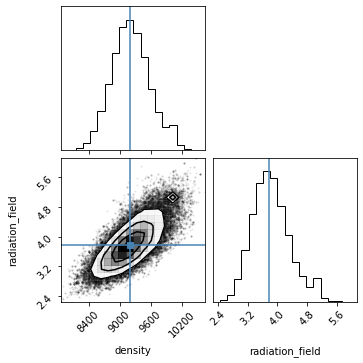

In [11]:
res = p.fit_result[0]
fig = corner.corner(res.flatchain, labels=res.var_names, truths=list(res.params.valuesdict().values()))

### Data for p1

In [12]:
myunit = "erg s-1 cm-2 sr-1" 
intensity = {
    "CII_158": 1.2E-3,
    "CO_32": 4.3E-6,
    "OI_63": 6.4E-3,
    "FIR": 0.9,
    "H200S1":6.6E-5,
    "H200S2":1.5E-4
}
error = {
    "CII_158": 1.83E-5,
    "CO_32": 2.54E-8,
    "OI_63": 3.30E-4,
    "FIR": 0.2*intensity["FIR"],  #guess 20%??
    "H200S1": 8.7E-6,
    "H200S2": 1.26E-5
}
a = []
for k in intensity:
    a.append(Measurement(data=intensity[k],uncertainty = StdDevUncertainty(error[k]),identifier=k,unit=myunit))
for m in a:
    print(f'{m.id:>7s}  {m:3.2e}')

CII_158  1.20e-03 +/- 1.83e-05 erg / (cm2 s sr)
  CO_32  4.30e-06 +/- 2.54e-08 erg / (cm2 s sr)
  OI_63  6.40e-03 +/- 3.30e-04 erg / (cm2 s sr)
    FIR  9.00e-01 +/- 1.80e-01 erg / (cm2 s sr)
 H200S1  6.60e-05 +/- 8.70e-06 erg / (cm2 s sr)
 H200S2  1.50e-04 +/- 1.26e-05 erg / (cm2 s sr)


/home/mpound/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
p1 = LineRatioFit(ms,a)
p1.run()
print(f' n = {p1.density:.2e}\nG0 = {p1.radiation_field:.2e}')
p1.fit_result[0]

/home/mpound/src/pdrtpy/pdrtpy/tool/lineratiofit.py:353: UserWarning: LineRatioFit: No beam parameters in Measurement headers, assuming they are all equal!
  self._check_compatibility()


 n = 9.15e+03 +/- 1.26e+03 1 / cm3
G0 = 3.70e+00 +/- 1.61e+00 erg / (cm2 s)


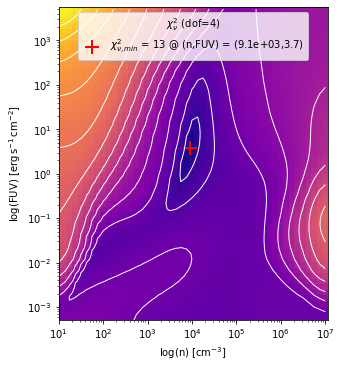

In [14]:
plot1 = LineRatioPlot(p1)
plot1.reduced_chisq(legend=True,norm='log')

/home/mpound/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


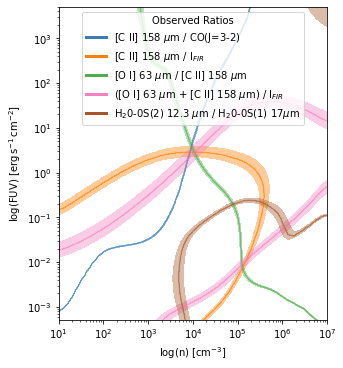

In [15]:
plot1.overlay_all_ratios(measurements=None)

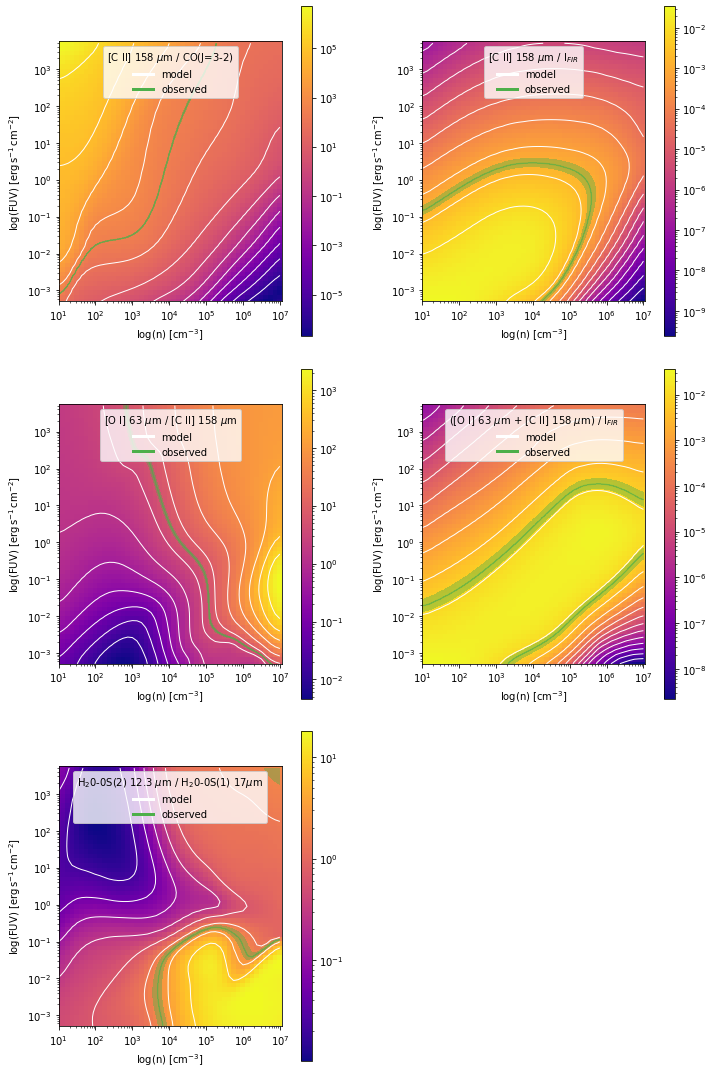

In [16]:
plot1.ratios_on_models(image=True,ncols=2,meas_color=['#4daf4a'],norm='log')

### You can pass some emcee keywords to *run()*
More steps means a longer time to compute, but will ensure the chain is long enough.

See https://lmfit-py.readthedocs.io/en/latest/fitting.html#lmfit.minimizer.Minimizer.emcee

In [17]:
p1.run(method="emcee", steps=2050, burn=50)

/home/mpound/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/mpound/src/pdrtpy/pdrtpy/tool/lineratiofit.py:353: UserWarning: LineRatioFit: No beam parameters in Measurement headers, assuming they are all equal!
  self._check_compatibility()
100%|██████████| 2050/2050 [08:05<00:00,  4.22it/s]


#### You can modify the corner plot, changing the labels or using other available keywords.
See https://corner.readthedocs.io/en/latest/api.html

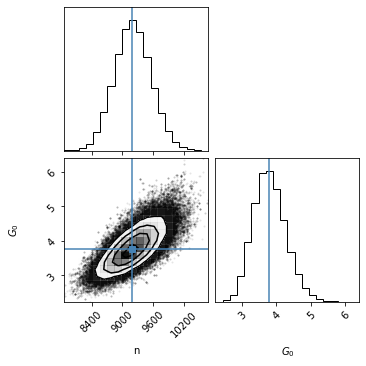

In [18]:
res = p1.fit_result[0]
fig = corner.corner(res.flatchain, labels=['n','$G_0$'], truths=list(res.params.valuesdict().values()))